 ## Task -01(Intermediate Level Task): Exploratory Data Analysis on Dataset- Terrorism

## Author: Zashi Avinash Patil

## Dataset: https://bit.ly/2TK5Xn5

## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load the Dataset

In [2]:
df =pd.read_csv("globalterrorismdb_0718dist.csv", encoding="latin1")
df

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [3]:
#knowing datatypes
df.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

## Select necessary columns & data cleaning

In [4]:
df = df[['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'city', 'location', 'summary', 'attacktype1_txt', 
            'targtype1_txt', 'motive', 'nkill', 'nwound', 'gname']]

In [5]:
df.head()

,iyear,imonth,iday,country_txt,region_txt,city,location,summary,attacktype1_txt,targtype1_txt,motive,nkill,nwound,gname
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,NaN,NaN,Assassination,Private Citizens & Property,NaN,1.0,0.0,MANO-D
1,1970,0,0,Mexico,North America,Mexico city,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),NaN,0.0,0.0,23rd of September Communist League
2,1970,1,0,Philippines,Southeast Asia,Unknown,NaN,NaN,Assassination,Journalists & Media,NaN,1.0,0.0,Unknown
3,1970,1,0,Greece,Western Europe,Athens,NaN,NaN,Bombing/Explosion,Government (Diplomatic),NaN,NaN,NaN,Unknown
4,1970,1,0,Japan,East Asia,Fukouka,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),NaN,NaN,NaN,Unknown


In [6]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day', 'attacktype1_txt':'Attack Name', 'targtype1_txt':'Target Type',
                  'nkill':'No to kill', 'nwound':'Wonded', 'gname':'group name'}, inplace=True)
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Year,Month,Day,country_txt,region_txt,city,location,summary,Attack Name,Target Type,motive,No to kill,Wonded,group name
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,NaN,NaN,Assassination,Private Citizens & Property,NaN,1.0,0.0,MANO-D
1,1970,0,0,Mexico,North America,Mexico city,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),NaN,0.0,0.0,23rd of September Communist League
2,1970,1,0,Philippines,Southeast Asia,Unknown,NaN,NaN,Assassination,Journalists & Media,NaN,1.0,0.0,Unknown
3,1970,1,0,Greece,Western Europe,Athens,NaN,NaN,Bombing/Explosion,Government (Diplomatic),NaN,NaN,NaN,Unknown
4,1970,1,0,Japan,East Asia,Fukouka,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),NaN,NaN,NaN,Unknown


In [7]:
#Check Missing values

df.isna().sum()

Year                0
Month               0
Day                 0
country_txt         0
region_txt          0
city              434
location       126196
summary         66129
Attack Name         0
Target Type         0
motive         131130
No to kill      10313
Wonded          16311
group name          0
dtype: int64

In [8]:
# Fill Null Values

df['No to kill'] = df['No to kill'].fillna(0)
df['Wonded'] = df['Wonded'].fillna(0)

<ipython-input-8-f388e38a0207>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No to kill'] = df['No to kill'].fillna(0)
<ipython-input-8-f388e38a0207>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Wonded'] = df['Wonded'].fillna(0)


In [9]:
df.isna().sum()

Year                0
Month               0
Day                 0
country_txt         0
region_txt          0
city              434
location       126196
summary         66129
Attack Name         0
Target Type         0
motive         131130
No to kill          0
Wonded              0
group name          0
dtype: int64

In [10]:
# Statistical of analysis of data
df.describe()

,Year,Month,Day,No to kill,Wonded
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,2.266860,2.883296
std,13.259430,3.388303,8.814045,11.227057,34.309747
min,1970.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,2.000000,2.000000
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000


## Data Visualization

## 1.Year wise Attacks

In [11]:
attacks = df['Year'].value_counts().sort_index().to_frame().reset_index().rename(columns={"index":"Year", "Year":"Attacks"}).set_index("Year")
attacks.head()

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


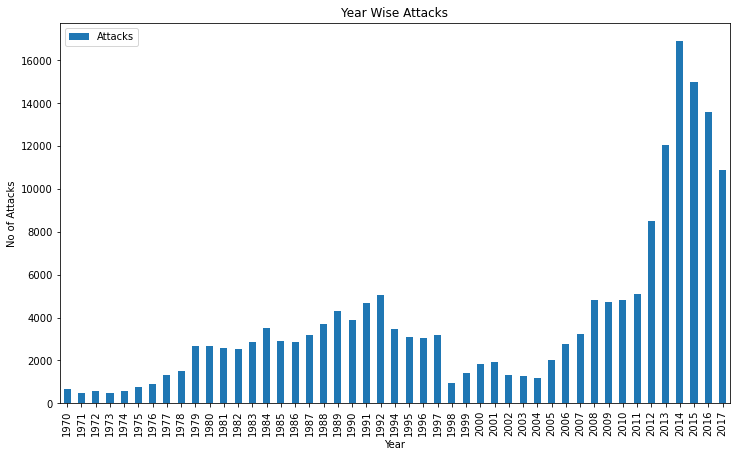

In [12]:
attacks.plot(kind='bar', figsize=(12,7))
plt.xlabel("Year")
plt.ylabel("No of Attacks")
plt.title("Year Wise Attacks")
plt.show()

In [13]:
killed = df[['Year', 'No to kill']].groupby('Year').sum()
killed.head()

,No to kill
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


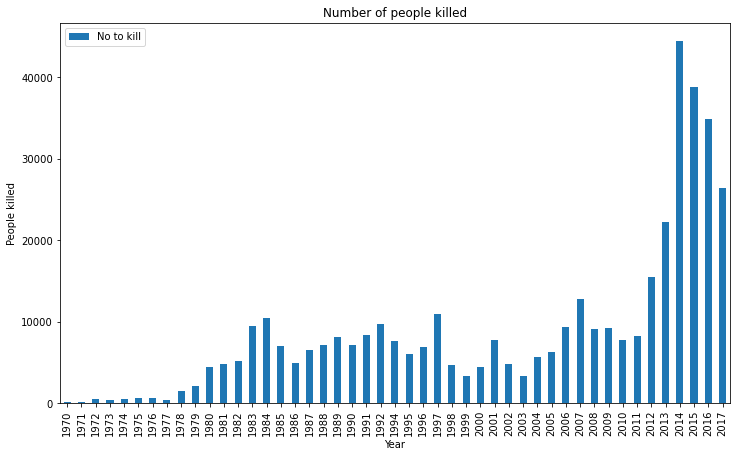

In [14]:
killed.plot(kind='bar', figsize=(12, 7))
plt.xlabel("Year")
plt.ylabel('People killed')
plt.title("Number of people killed")
plt.show()

In [15]:
wounded = df[["Year","Wonded"]].groupby("Year").sum()
wounded.head()

,Wonded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


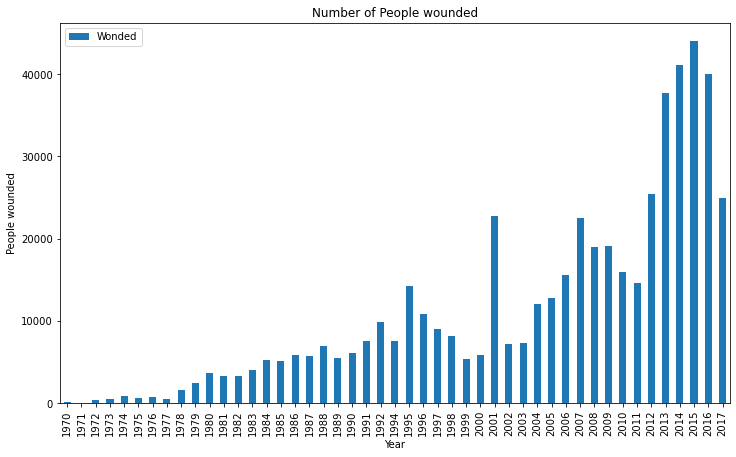

In [16]:
wounded.plot(kind='bar', figsize=(12,7))
plt.xlabel("Year")
plt.ylabel("People wounded")
plt.title("Number of People wounded")
plt.show()

## 2. Region wise Attacks

##### 1) Terrorist Attacks over Regions from 1970-2017

In [17]:
region = pd.crosstab(df.Year, df.region_txt)
region.head()

region_txt,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


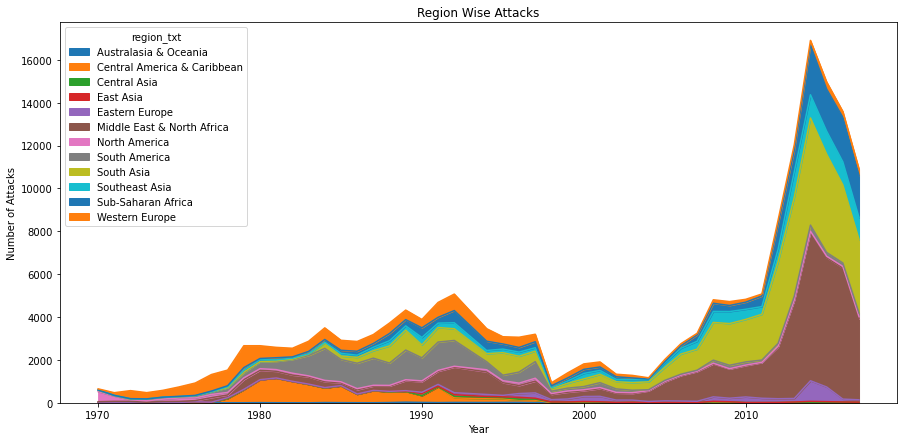

In [18]:
region.plot(kind='area', figsize=(15,7))
plt.title('Region Wise Attacks')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()

##### 2)Total terrorist Attacks Region wise from 1970 - 2017

In [19]:
regiontr = region.transpose()
regiontr["Total"] = regiontr.sum(axis=1)
rt = regiontr['Total'].sort_values(ascending=True)
rt

region_txt
Australasia & Oceania            282
Central Asia                     563
East Asia                        802
North America                   3456
Eastern Europe                  5144
Central America & Caribbean    10344
Southeast Asia                 12485
Western Europe                 16639
Sub-Saharan Africa             17550
South America                  18978
South Asia                     44974
Middle East & North Africa     50474
Name: Total, dtype: int64

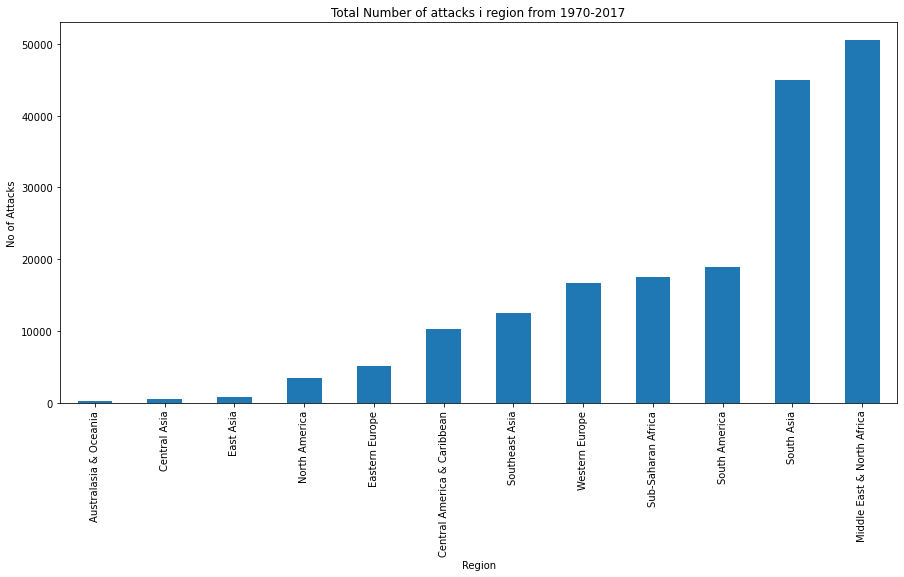

In [20]:
rt.plot(kind='bar', figsize=(15,7))
plt.title("Total Number of attacks i region from 1970-2017")
plt.xlabel('Region')
plt.ylabel('No of Attacks')
plt.show()

##### 3) Killed in each region

In [21]:
region_killed = df[['region_txt', 'No to kill']].groupby('region_txt').sum().sort_values(by='No to kill', ascending=True)
region_killed

,No to kill
region_txt,
Australasia & Oceania,150.0
Central Asia,1000.0
East Asia,1152.0
North America,4916.0
Western Europe,6694.0
Eastern Europe,7415.0
Southeast Asia,15637.0
Central America & Caribbean,28708.0
South America,28849.0


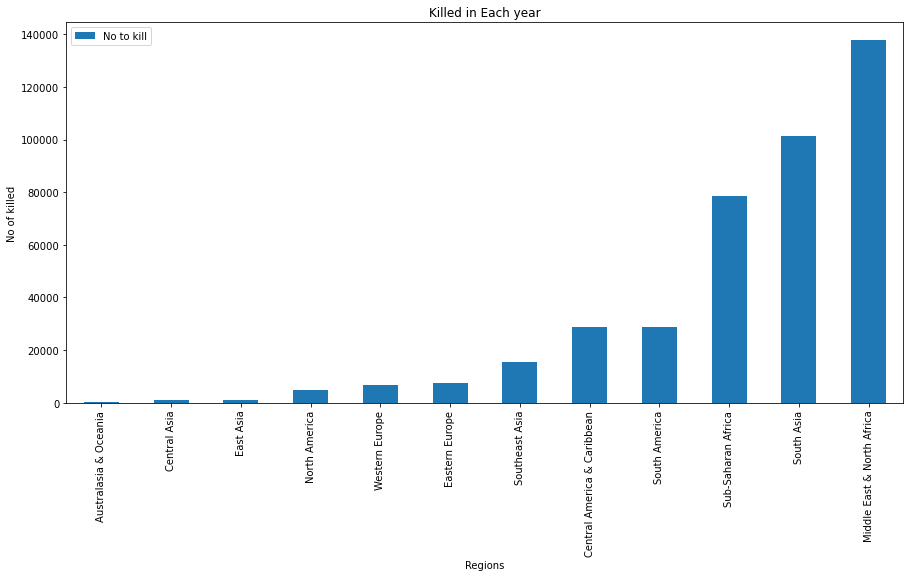

In [22]:
region_killed.plot(kind='bar', figsize=(15,7))
plt.title('Killed in Each year')
plt.xlabel('Regions')
plt.ylabel('No of killed')
plt.show()

##### 4) wounded in each year

In [23]:
region_wounded = df[['region_txt', 'Wonded']].groupby('region_txt').sum().sort_values(by="Wonded", ascending=True)
region_wounded

,Wonded
region_txt,
Australasia & Oceania,260.0
Central Asia,2009.0
Central America & Caribbean,8991.0
East Asia,9213.0
Eastern Europe,12045.0
South America,16704.0
Western Europe,18332.0
North America,21531.0
Southeast Asia,26259.0


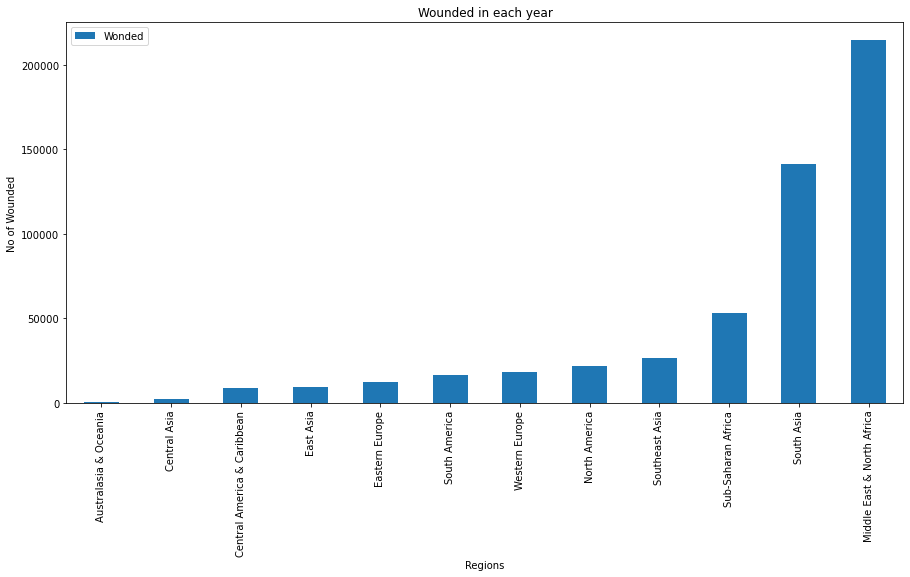

In [24]:
region_wounded.plot(kind='bar', figsize=(15,7))
plt.title('Wounded in each year')
plt.xlabel('Regions')
plt.ylabel('No of Wounded')
plt.show()

## 3. Country wise top 10 Attacks

##### 1) No of Attacks in each Country-Top 10

In [25]:
country_attack = df['country_txt'].value_counts().head(10)
country_attack

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: country_txt, dtype: int64

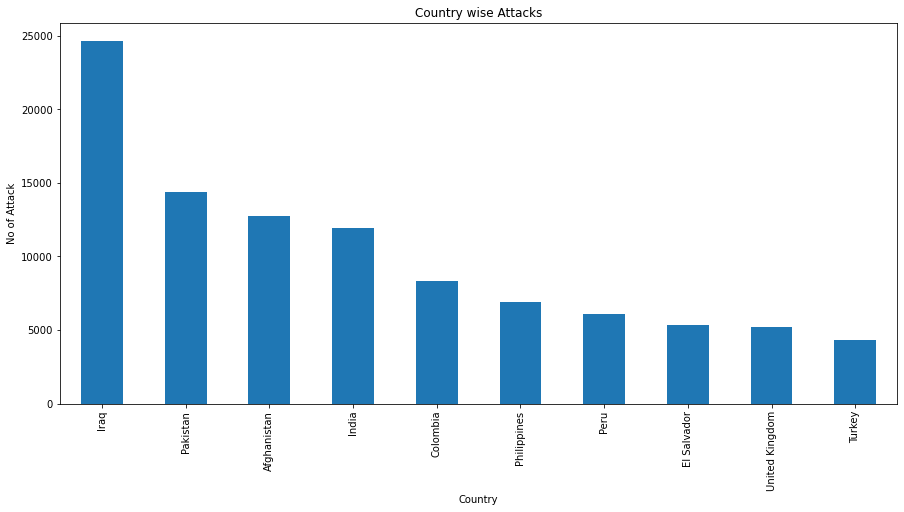

In [26]:
country_attack.plot(kind='bar', figsize=(15, 7))
plt.title('Country wise Attacks')
plt.xlabel('Country')
plt.ylabel('No of Attack')
plt.show()

In [27]:
c_kill = df[['country_txt','No to kill']].groupby('country_txt').sum().sort_values(by='No to kill',ascending=False).head(10)
c_kill

,No to kill
country_txt,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0
Sri Lanka,15530.0
Syria,15229.0
Colombia,14698.0
Peru,12771.0


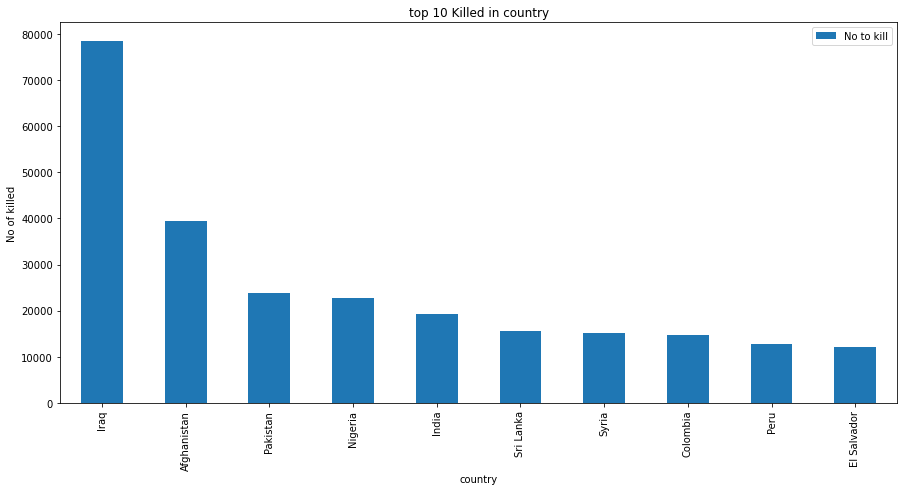

In [30]:
c_kill.plot(kind='bar', figsize=(15, 7))
plt.title("top 10 Killed in country")
plt.xlabel("country")
plt.ylabel("No of killed")
plt.show()

##### 3)Wounded in each Country

In [32]:
c_wounded = df[['country_txt', 'Wonded']].groupby('country_txt').sum().sort_values(by='Wonded', ascending=False).head(10)
c_wounded

,Wonded
country_txt,
Iraq,134690.0
Afghanistan,44277.0
Pakistan,42038.0
India,28980.0
United States,20702.0
Sri Lanka,15561.0
Syria,14109.0
Philippines,13367.0
Lebanon,10904.0


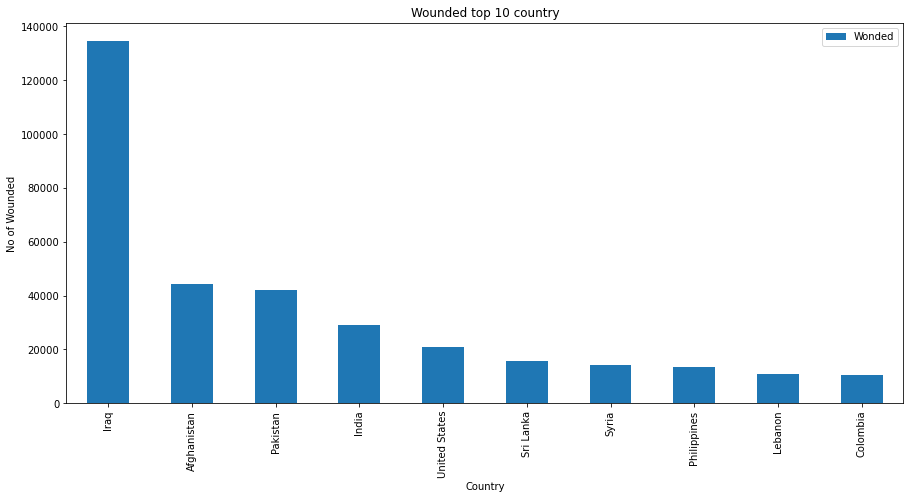

In [33]:
c_wounded.plot(kind='bar', figsize=(15,7))
plt.title('Wounded top 10 country')
plt.xlabel('Country')
plt.ylabel('No of Wounded')
plt.show()

## 4. Citywise top 10 Attacks

In [34]:
city_attack = df['city'].value_counts().head(10)
city_attack

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: city, dtype: int64

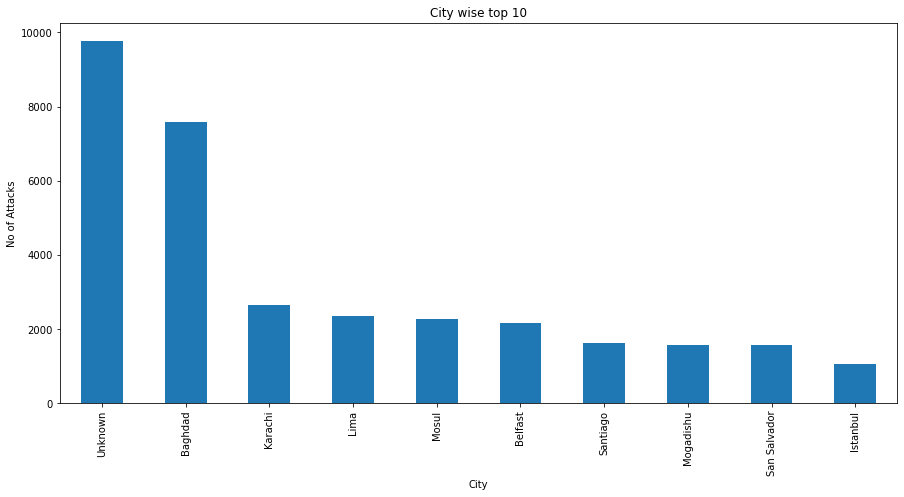

In [36]:
city_attack.plot(kind='bar', figsize=(15,7))
plt.title('City wise top 10')
plt.xlabel('City')
plt.ylabel('No of Attacks')
plt.show()

## 5. Terrorist group wise top 10 Attacks

In [37]:
t_groups = df['group name'].value_counts()[1:10]
t_groups

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: group name, dtype: int64

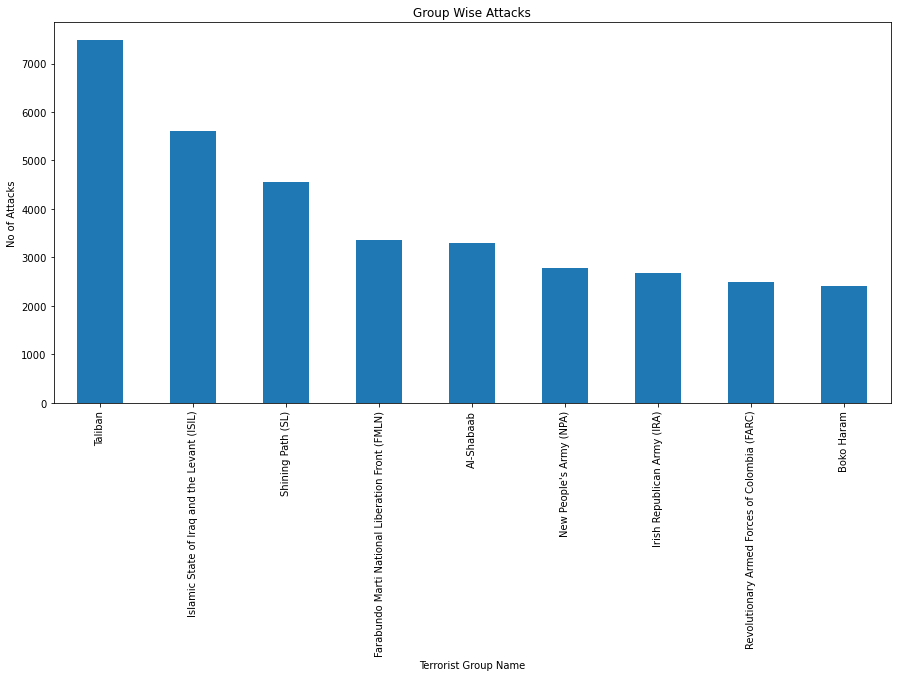

In [38]:
t_groups.plot(kind='bar', figsize=(15, 7))
plt.title('Group Wise Attacks')
plt.xlabel('Terrorist Group Name')
plt.ylabel('No of Attacks')
plt.show()

## 6. Attack type wise Attacks

In [39]:
attacks_type = df['Attack Name'].value_counts()
attacks_type

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attack Name, dtype: int64

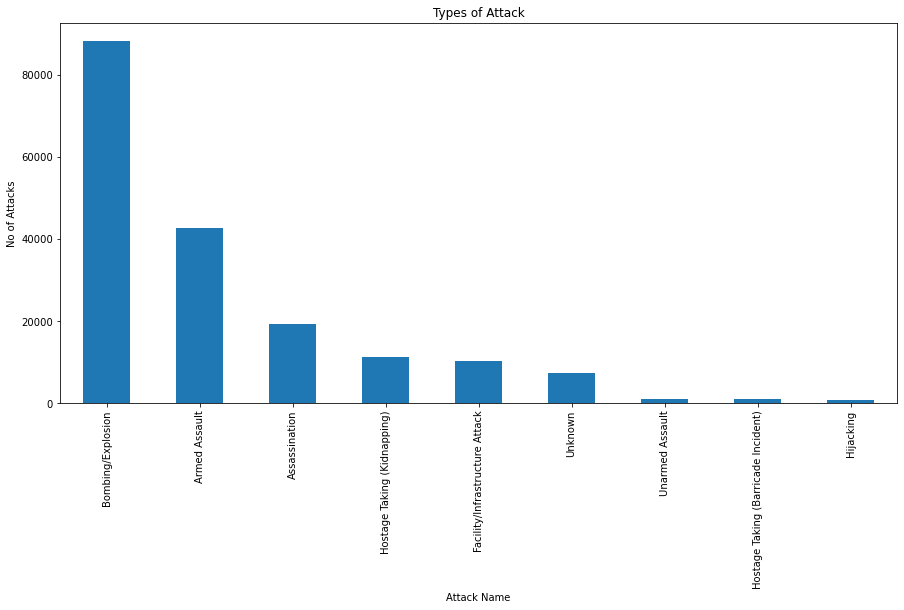

In [42]:
attacks_type.plot(kind='bar', figsize=(15, 7))
plt.title('Types of Attack')
plt.xlabel('Attack Name')
plt.ylabel('No of Attacks')
plt.show()